In [ ]:
# .py

"""
-Answer-
En 'Simple Linear Reggression' model har barar en feature "y = beta_0 + beta_1 * feature_1"
En 'multiple linear regression' model har mer än en feature y = beta_0 + beta_1 * feature_1 + beta_2 * feature_2 ... beta_d * feature_d



'd' = dimensions/features/inputs it does not include beta_0\bias nor the y column
'k' i "Code Along" är lika med 'd' i labben
'n' = number of observation aka rows

Dependency Checks : We are allowed to use scipy.stats.pearsonr(...) 

The labb was wrong it's SSR = Syy - SSE

-Questions-
I labben så använder vi 'Ordinary Least Squares' metod, finns det en 'Least Squares' metod?


Hur plottar jag en regressions linje i från en 'multiple linear regression' model?

Med 'simple linear regression' model så 
1. kör jag den igenom np.linalg.pinv(X.T @ X) @ X.T @ Y  
2. Jag får då ut [bias, coeff_1] 
3. x = np.linspace(0,300)
4. bias + (coeff_1 * x) 

När jag har ex 3 features i min model gör jag då samma sak?
1. np.linalg.pinv(X.T @ X) @ X.T @ Y  
2. [bias, coeff_1, coeff_2, coeff_3]
3. x = np.linspace(0,300)
4. bias + ( (coeff_1 * x) + (coeff_2 * x) + (coeff_3 * x) ) / 3

Det jag är osäker på är om jag ska summera coeff och dela dessa med antalet 



Notes To be Removed
Statiska för hela är F-distrubutionen
Vi omvandlar t-statiska till p värdet
statiska för enskilda variabler i VG delen

F-distrubutionen : variation av conirnulig gamma-distrubtion

F-distrubuionen : det är p värdet du är ute efter och du ska få ett värde mellan 1 och 0 
om du får ett värde nära noll så är det väldigt osanlikt att 0 hypotsen är releveant aka
p = 0 = featuren är relevant för y värdet


"""


"""
Answers G
V Create and work towards a git repo
X .py-file Should Contain Only: Your LinearRegression Class, numpy and scipy.stats modules.
X .ipynb-file : Call the code from the py-file and demonstrat its functionality  
X Implement and check the labb data
X Cleanup the code
V A property d that contains the number of features/parameters/dimensions of the model.
  .d
V A property n that contains the size of the sample.
  .n 
X A function or method to calculate the variance.
  .var() 
  (?) Check that the formula is correct
X A function or method to calculate the standard deviation
  .std()
  (?) Check that it's correct
X A function or method that reports the significance of the regression
  (?) Don't know what this is 
X A function or method that reports the relevance of the regression (R2)
  .R2()
  (?) Can I display the value or do I need to add some text as well

Answer VG 
X Significance tests on individual variables, in particular categorical variables.
  (?) Its not .r() because thats the next task
X A function or method that calculates the Pearson number between all pairs of parameters.
 .r()
 (X) Refine the output
 (?) Are we alowed to use pearsonr from scipy.stas
X Confidence intervals on individual parameters.
  .p_beta
  (?) Check that this is correct
X A property confidence level that stores the selected confidence level.  
  .rsq() 
  (?) Double check so its correct
X Examine if Ithere an observer bias in the data collected for the small-diameter flow measurements
"""

import pandas as pd 
import numpy as np 
from scipy.stats import pearsonr, f, t 

path = "../Resources/Advertising.csv"
adv = pd.read_csv(path)
adv.drop(columns="Unnamed: 0", inplace=True)
class LinearRegression():
    def __init__(self, data, y):
        self.data = data 
        self.y = y 
        self._X = None
        self._Y = None
        self._column_names = None

        # d = dimensions/features/inputs it does not include beta_0\bias nor the y column
        self.d = data.shape[1]-1
        # I assume n is simply rows aka observations
        self.n = data.shape[0]
    
    
    # Adds a bias column consiting of ones to X
    # Turn: X =         feature_1, feature_2, ..., feature_d 
    # Into: X = bias_0, feature_1, feature_2, ..., feature_d
    @property
    def X(self):
        # Column stack simply add anothoer column to a set of columns
        # np.ones creates a new column that consits of ones, the argument equals the number or rows in the column
        X = self.data.drop(columns=[self.y])
        X = np.array(X)
        X = np.column_stack([np.ones(X.shape[0]), X])
        return X
   
    @property
    def Y(self):
        Y = self.data[self.y] 
        Y = np.array(Y)
        return Y
    
    @property
    def column_names(self):
        X = list(self.data.drop(columns=[self.y]).columns)
        Y = self.y
        column_names = { "X":X, "Y":Y, }
        return column_names

    # Detta är vår "Line of Regression"
    # [0]=m  [1]=k  
    # Y-hat = B_0 + B_1 * x (Simple Regression)
    # Turn: (bias_0, feature_1, feature_2, ..., feature_d) and (Y)
    # Into: [true_bias, coefficient_1, coefficient_2, ..., coefficient_d ]
    #
    # How to plot the "Line of Regression" (simple linear regression) 
    # y_hat is the aproximation of y 
    # 1. b = np.linalg.pinv(X.T @ X) @ X.T @ Y  
    # 2. x = np.linspace(0,300) 
    # 3. y_hat = b[0] + b[1]*x
    #
    # How to plot the "Line of Regression" (multiple linear regression) 
    # y_hat is the aproximation of y 
    # 1. b = np.linalg.pinv(X.T @ X) @ X.T @ Y  
    # 2. x = np.linspace(0,300) 
    # 3. y_hat = b[0] + (b[1]*x + b[2]*x + ... + b[d]*x)/d    (?) not 100% sure this is correct
    #
    # Note 
    # We use linespace to get a continues line 
    # if we had a new observation aka row without y and we wanted to use our 
    # model to predict its y value then x = (x_1, x_2, ..., x_d), basically 
    # we would replace step three to get y_hat for that perticular row
    
    def ordinary_least_square(self):
        # .pinv == ^{-1} == inversen 
        X = self.X
        Y = self.Y
        return np.linalg.pinv(X.T @ X) @ X.T @ Y
        
        

    
    def significance_of_regression(self):
        # 1. Set Up Hypotheses
        # Null Hypothesis (H0): There is no relationship between X and Y
        # Alternative Hypothesis (Ha): There is a relationship between X and Y

        # 2. Calculate the F-Statistic 

        # 3. Determine the Degrees of Freedom
        pass 
    def relevance_of_regression(self):
        pass



    # Residual Sum of Square Erros (SSE or RSS)
    # Detta är det värde vi vill få så lågt som möjligt
    # hade vi fått det till 0 så hade alla feature befunnit sig 
    # på vår "line of regression" och alla kofficienter hade varit = 1.   
    def SSE(self):
        b = self.ordinary_least_square()
        X = self.X 
        Y = self.Y 
        return np.sum(np.square(Y - (X @ b)))
  

    # Den totala variansen i y 
    # y - y_hat
    # Så fel marginalen i mellan det sanna y värdet och det 
    # y värde vi får fram med hjälp av "ordinary_least_squared" 
    def Syy(self):
        n = self.Y.shape[0]
        Y = self.Y 
        return np.sum(np.square(self.Y)) - (np.square(np.sum(self.Y))/n)    

    # Confidence(?)
    def con(self):
        d = self.d
        ssr = self.ssr()
        var = self.var()
        # ssr = Syy - SSE, d=dimensions,  var = Sigma Hat Squared
        return (ssr/d)/var



    # Significance(?)
    def ssr(self):
        return self.Syy() - self.SSE()

    # standard deviation aka Sigma (standard feel)
    # note even sure that this is correct because the var is 
    # different depending on if it's a simple linear equation or one 
    # with mor then one feature
    # note this is not needed for the Lab
    def std(self):
        # The fromula according to the CAL is sigma^2/2 
        return self.var()/2 
        # But in the Lab it's known only as sigma so shouldn't it then be 
        # the square root of variance  
        #return np.sqrt(self.var())

    # variance aka Sigma Hat Squared
    # Note that for simple regression the formula is slightly different 
    # as you don't get the hat aka it's not an aproximation

    # Sigma Squared
    def S(self):
        # Stora S = sigma hat kvadrat
        # So this is probably std, std should be variance squared not variance halved
        return np.sqrt(self.var())


    def var(self):
        # Maybe unnessary to have these in two places
        # Note that you maye need one more step S = np.sqrt(var)
        d = self.d
        n = self.n
        return self.SSE()/(n-d-1)
    


    def beta_statics_all(self):
        c = self.c 
        beta = self.X
        S = self.S()
        # beta_statistic = beta[feature] / (S*np.sqrt(self.c()[feature, feature]))
        # the original focus on only one feature, I don't know how you make it work 
        # on all features at once.
        return beta / (S*np.sqrt(self.c()))
        

    def r(self):
        # V1
        # return pearsonr(self.X.T[column], self.Y)
        
        # V2
        # result = ""
        # for idx in range(len(cnx)):
        #     p = pearsonr(self.X.T[idx], self.Y)      
        #     col = cnx[idx]
        #     result += f"{col:>10} : Statistics = {p[0]:<20} pvalue = {p[1]}\n"
        
        # V3 
        # Note basicaly this prodcuses a scatter matrix, I could refine it so 
        # we don't get doubleets as the formula is let and right hand agnostic
        # also I could print out a little note explaining the two values rather
        # then printing out them vs them self.
        result = ""
        X = self.X[:,1:]
        cnx = self.column_names["X"]
        cny = self.column_names["Y"]
        for idx in range(len(cnx)):
            col_a = cnx[idx]
            p = pearsonr(X.T[idx] , self.Y) 
            result += f"{col_a:>10} VS {cny:<10} : Statistics = {p[0]:<20} pvalue = {p[1]}\n"
            for idy in range(len(cnx)):
                p = pearsonr(X.T[idx], X.T[idy])      
                col_b = cnx[idy]
                result += f"{col_a:>10} VS {col_b:<10} : Statistics = {p[0]:<20} pvalue = {p[1]}\n"
         

        
        return result

    #  coefficient of multiple determination
    def R2(self):
        return self.ssr()/self.Syy()
    

    # is c the same as c_{ii} ?
    # Variance/CoVariance Matrix
    def c(self):
        X = self.X
        # It looks like this produces som form of scatter matrix
        return np.linalg.pinv(X.T @ X) * self.var()

    # I believe this is 'A confidence interval for the individual parameters (features) of the model is given by'
    def p_beta(self, feature):
        # You select which feature you want to investigate
        # note that beta_0 is included aka the bias
        # note I could make it so that it checks all features
        beta = self.ordinary_least_square()
        S = self.S()
        # Remeber c is a matrix
        # Beta_statistics should maybe be it's own function 
        beta_statistic = beta[feature] / (S*np.sqrt(self.c()[feature, feature]))

        k = self.d+1 # why is this +1
        n = self.n 
        # I belive that there is an error in the lab description
        # the right hand should be t.sf not t.cdf  
        p_beta = 2*min(t.cdf(beta_statistic, n-k-1), t.sf(beta_statistic, n-k-1))
        return p_beta 
    
    # This number helps us determine which 'Confidence Level' to use
    # in the case of advertisment the rsq is 0.89... meaning almost 90%
    # so we should set our Confidence Level to 90%
    def rsq(self):
        return self.ssr()/self.Syy()

    # sig statistics 
    def sis (self):
        d = self.d
        return (self.ssr()/d)/self.S() 

    # p significance
    def p_sig(self):
        n = self.n 
        d = self.d

        return f.sf(self.sis(), d, n-d-1)



lr = LinearRegression(X=adv[["TV","radio","newspaper"]],Y=adv[["sales"]])

lr = LinearRegression(adv,"sales")

b = lr.ordinary_least_square()
#X = lr.X
SSE = lr.SSE()
#r = lr.r()
#print(r)
Syy = lr.Syy()
var = lr.var()
std = lr.std()
ssr = lr.ssr()
con = lr.con()
R2 = lr.R2()
c = lr.c()
p_beta_newspaper = lr.p_beta(3)
#beta_statics_all = lr.beta_statics_all()
rsq = lr.rsq()
sis = lr.sis() 
p_sig = lr.p_sig()


# print(f"d = {lr.d}")
# print(f"n = {lr.n}")
#print(lr.r())

b
ssr
con
type(lr.X)

#X = np.array(adv.drop(columns=["sales"]))
#Y = np.array(adv["sales"])
#X
lr.sis()
lr.d
lr.column_names["X"]
Syy
lr.Y.mean()
y=np.array([1,3,8])
y.mean()
var
SSE

556.8252629021872

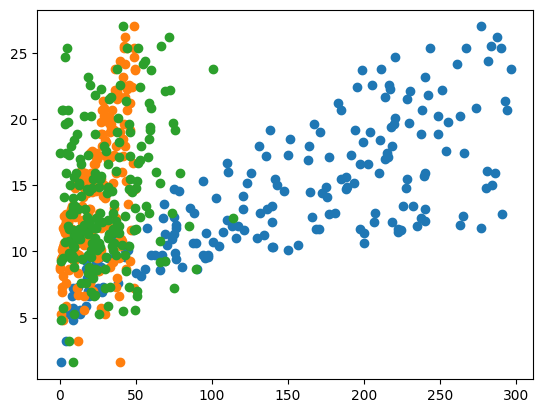

In [3]:
import matplotlib.pyplot as plt 
plt.scatter(adv["TV"],adv["sales"] )
plt.scatter(adv["radio"],adv["sales"] )
plt.scatter(adv["newspaper"],adv["sales"] )
#x = np.linspace(0,300)
#y_hat = b[0] + b[1]*x
#plt.plot(x, y_hat, c="red")

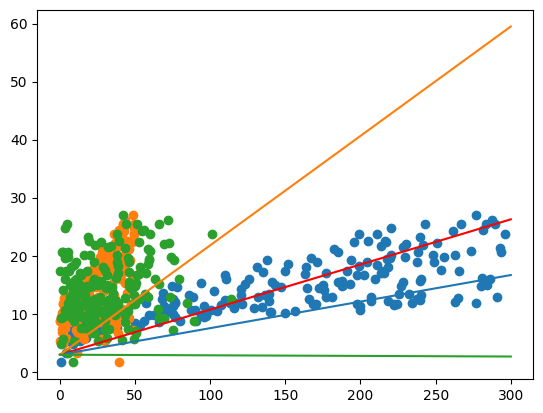

In [4]:
import matplotlib.pyplot as plt 

x = np.linspace(0,300)
y_hat = b[0] + (b[1]*x + b[2]*x + b[3]*x)/3
plt.plot(x, y_hat, c="red")
li = ["TV", "radio", "newspaper"]
for i in range(3):
    plt.scatter( adv[li[i]],adv["sales"] )
    y_hat = b[0] + b[i+1]*x
    plt.plot(x, y_hat)

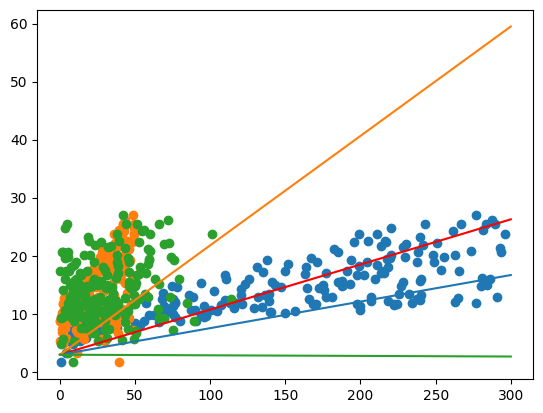

In [8]:
import matplotlib.pyplot as plt 

x = np.linspace(0,300)
y_hat = b[0] + (b[1]*x + b[2]*x + b[3]*x)/3
plt.plot(x, y_hat, c="red")
li = ["TV", "radio", "newspaper"]
for i in range(3):
    plt.scatter( adv[li[i]],adv["sales"] )
    y_hat = b[0] + b[i+1]*x
    plt.plot(x, y_hat)

In [35]:
coef = np.array([1,2,3])
feat = np.array([1,2,3])
coef @ feat

14

In [219]:
class Zerglin:
    def __init__(self, arg): self.arg=arg 

    
    @property
    def health(self): 
        return self.arg[0]
    @property
    def damage(self): 
        return self.arg[1]
    @property
    def speed(self): 
        return self.arg[2] 

    def spawn(self):
        print(f"{self.health=} | {self.damage=} | {self.speed=} ")

z_alpha = Zerglin((35, 6, 12))

z_alpha.spawn()
z_alpha.health

self.health=35 | self.damage=6 | self.speed=12 


35

In [155]:

li=[1,2,3]
np.mean([0,1,5])

2.0

In [157]:

reg = regression = [2, 3, 5, 2]
x =[10, 100, 1000]

sum(coef*feat for coef, feat in zip(reg[1:],x))+reg[0]

2532

In [182]:
# TSS 
Y = [1,2,3,4,5,6]
sum((y-np.mean(Y))**2 for y in Y )
X = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
X.shape
X[:,1]

array([2, 5, 8])

In [216]:
Y = lr.Y
Yl = Y.astype(int)
Yl = list(Yl)
TSS = sum((y-np.mean(Y))**2 for y in Y )
#var(Yl)
#TSS
type(Yl[2])
Yl
Yli = [22,10,9,18,12]

np.var(Yli)

24.96

In [218]:
lr.X
lr.X.shape

(200, 4)

In [251]:
x = np.array([[1, 2, 3],[4,5,6],[7, 8, 9]])
pearsonr(x.T[0], x.T[1])
x[:,1]

array([2, 5, 8])

In [308]:
# SSE
b = lr.ordinary_least_square()
Y_hat = (lr.X[:,1:] @ b[1:])+b[0] 
#+ b[0]
#Y_hat.shape
n = Y.shape[0]
d = 3 
Y = lr.Y
SSE = sum((y-y_hat)**2 for y, y_hat in zip(Y,Y_hat))
print( SSE/(len(Y)-d-1))
print( np.var(Y-Y_hat, ddof=d+1) )
print(n, len(Y))

2.8409452188887094
2.8409452188887103
200 200


In [266]:
b = lr.ordinary_least_square()
b0=b[0]
X0 = np.array([0,0,0])
lr.X[0,1:]@b[1:]+b0
X0 @ b[1:]+b0
b0

2.938889369458172

In [ ]:
#SSE

In [358]:
import scipy
# Covariance 
Xa = [1,2,3,4,5]
Xb = [1,2,3,4,5]
def covariance(Xa, Xb):
    mXa = np.mean(Xa)
    mXb = np.mean(Xb)
    n = len(Xa)
    #covariance = sum( (Xa[i] - mXa) * (Xb[i] - mXb)  for i in range(n))
    covariance = sum( (Xai - mXa) * (Xbi - mXb)  for Xai, Xbi in zip(Xa, Xb))
    return covariance

print( covariance(Xa, Xb) )




# pearsonsnr using np.cov and var... doesnt work
# np.cov(Xa,Xb)/np.sqrt(np.var(Xa)*np.var(Xb))

#scipy.stats.pearsonr(Xa,Xb)

scipy.stats.pearsonr(adv['TV'],adv["sales"])
# import pandas as pd

# data_set = pd.DataFrame([[1,2],[3,4]], columns=["sales","advertising"] )
# data_set["advertising"]

10.0


PearsonRResult(statistic=0.7822244248616067, pvalue=1.4673897001946062e-42)

In [379]:

# np.sum(np.square(self.Y)) - (np.square(np.sum(self.Y))/n)  

#(np.sum(np.square(self.Y)) - (np.square(np.sum(self.Y))) /n  

Y = lr.Y 
n = Y.shape[0]

#(n*sum( y**2 for y in Y) - sum(Y)**2)/n
np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)
#lr.Syy()
u=Y.mean()
sum( (y-u)**2 for y in Y )


5417.14875

In [382]:
Y = lr.Y
#Syy
Syy = sum((y-np.mean(Y))**2 for y in Y ) 
#SSE
SSE = sum((y-y_hat)**2 for y, y_hat in zip(Y,Y_hat))
#SSR
SSR = sum((y_hat-np.mean(Y))**2 for y_hat in Y_hat)
print(f"Syy: {Syy} | {SSR+SSE} ")
print(f"SEE: {SSE} | {Syy-SSR} ")
print(f"SSR: {SSR} | {Syy-SSE} ")


Syy: 5417.148749999997 | 5417.148750000798 
SEE: 556.8252629021871 | 556.8252629013859 
SSR: 4860.323487098611 | 4860.323487097809 


In [389]:

X_train = lr.X 
Y_train = lr.Y
X = lr.X 
Y = lr.Y
b = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ Y_train
bb = np.linalg.pinv(X.T @ X) @ X.T @ Y
bbb = np.dot((np.linalg.inv(np.dot(X.T,X))), np.dot(X.T,Y)) 
print(b)
print(bb)
print(bbb)
print(lr.ordinary_least_square())


[ 2.93888937e+00  4.57646455e-02  1.88530017e-01 -1.03749304e-03]
[ 2.93888937e+00  4.57646455e-02  1.88530017e-01 -1.03749304e-03]
[ 2.93888937e+00  4.57646455e-02  1.88530017e-01 -1.03749304e-03]
[ 2.93888937e+00  4.57646455e-02  1.88530017e-01 -1.03749304e-03]


In [507]:
d = lr.d
n = lr.n
b = lr.ordinary_least_square()
X = lr.X 
# Check if SSE is correct
SSE = lr.SSE()
sigma_squared = SSE / (n-d-1)
sigma = np.sqrt(sigma_squared)  
c = np.linalg.pinv(X.T@X)*sigma_squared


def sqrt_polarity(n): 
    if n < 0: 
        n=abs(n) 
        n=np.sqrt(n)
        return n*-1 
    else:  
        return np.sqrt(n)

#[ [b[i]/(sigma * sqrt_polarity(c[i,j])) for j in range(len(c[i]))] for i in range(len(c))]
[ b[i]/[(sigma * sqrt_polarity(c[i,j])) for j in range(len(c[i]))] for i in range(len(c))]

[array([   5.59016936, -106.96302838,  -52.20583811,  -71.72164865]),
 array([ -1.66563775,  19.4650979 , -40.60932221, -47.51096911]),
 array([  -3.3490092 , -167.29237443,   12.9892384 ,  -26.5113264 ]),
 array([ 0.02531933,  1.07708253,  0.14589357, -0.10484337])]

In [534]:
d = lr.d 
n = lr.n 
b = lr.ordinary_least_square()
Y = lr.Y 
X = lr.X 

Y_hat = b[0] + X[:,1:] @ b[1:]
SSE = np.sum(np.square(Y - Y_hat))
var = SSE / (n-d-1) 

# Sigma aka Standard Diviation
S = np.sqrt(var) 

sig_statistic = (SSR/d)/S
p_significance = scipy.stats.f.sf(sig_statistic, d, n-d-1)
p_significance

6.373276981705402e-117

In [439]:
SSR/Syy

0.8972106381791

In [432]:
# Standard Variance
SSE
print(np.std(lr.Y, ddof=d-1))
print((SSE/(n-d-1))**0.5)
#σ = √[ Σ(xᵢ - μ)² / N
X=lr.X 
Y_mean = lr.Y.mean() 
n = lr.n 
np.sqrt( sum(x-Y_mean for x in X)**2 )/n  

5.230615367355176
1.685510373414744


array([ 13.0225, 133.02  ,   9.2415,  16.5315])

In [442]:
#lr.R2()
#adv.boxplot()

In [448]:
lr.std()
np.std() 

TypeError: std() missing 1 required positional argument: 'a'

In [454]:
#adv.corr()


print( lr.p_sig() )
lr.r()

6.373276981801425e-117


'        TV VS sales      : Statistics = 0.7822244248616067   pvalue = 1.4673897001946062e-42\n        TV VS TV         : Statistics = 1.0                  pvalue = 0.0\n        TV VS radio      : Statistics = 0.054808664465830145 pvalue = 0.440806063788431\n        TV VS newspaper  : Statistics = 0.05664787496505704  pvalue = 0.4256017578819632\n     radio VS sales      : Statistics = 0.5762225745710552   pvalue = 4.354966001766852e-19\n     radio VS TV         : Statistics = 0.054808664465830145 pvalue = 0.440806063788431\n     radio VS radio      : Statistics = 1.0                  pvalue = 0.0\n     radio VS newspaper  : Statistics = 0.35410375076117545  pvalue = 2.688835078719009e-07\n newspaper VS sales      : Statistics = 0.22829902637616545  pvalue = 0.0011481958688882026\n newspaper VS TV         : Statistics = 0.05664787496505704  pvalue = 0.4256017578819632\n newspaper VS radio      : Statistics = 0.35410375076117545  pvalue = 2.688835078719009e-07\n newspaper VS newspaper  

In [494]:
path = "../Resources/"
sdf = pd.read_csv(path+"Small-diameter-flow.csv")
Y = sdf["Flow"]

XA = sdf.drop(columns=["Unnamed: 0","Flow"]) 
XB = sdf.drop(columns=["Unnamed: 0","Flow", "Observer"]) 


XA 
XB
XAC = np.column_stack([np.ones(XA.shape[0]), XA])
XBC = np.column_stack([np.ones(XB.shape[0]), XB])
bA = np.linalg.pinv(XAC.T @ XAC) @ XAC.T @ Y # Bias adn with observer
bB = np.linalg.pinv(XBC.T @ XBC) @ XBC.T @ Y # Bias and no observer


bB

array([-2.55979314,  0.86871519,  3.61041818, -0.75368772])

In [488]:
np.sqrt(-1.500)

C:\Users\adamt\AppData\Local\Temp\ipykernel_21704\991996897.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-1.500)


nan

In [499]:

scipy.stats.t(X[:,1], Y)

In [503]:

sig_statistic = (SSR/lr.d)/lr.var()**0.5
p_significance = scipy.stats.f.sf(sig_statistic, lr.d, lr.n-lr.d-1)
p_significance

6.373276981705402e-117

In [ ]:
#βˆi ± tα/2σˆ2√cii